# 🏥 Ejercicios Prácticos: Limpieza de Registros Médicos

**Curso:** Extracción de Conocimiento en Bases de Datos  
**Ejercicio:** Limpieza y Transformación de Datos Médicos  
**Dataset:** `registros_medicos_sucios_15k.csv`

---

## 🎯 Objetivos del Ejercicio

Al completar este ejercicio, serás capaz de:

1. **🔍 Identificar** diferentes tipos de problemas en datos médicos reales
2. **🛠️ Aplicar** técnicas específicas de limpieza para cada problema
3. **📊 Validar** la calidad de los datos después de la limpieza
4. **📝 Documentar** el proceso de limpieza realizado
5. **⚡ Automatizar** procesos de limpieza para datos similares

---

## 📋 Problemas a Resolver

El dataset contiene **15,000+ registros médicos** con los siguientes problemas:

| 🚨 **Problema** | 📊 **Cantidad Estimada** | 🎯 **Técnica Requerida** |
|-----------------|---------------------------|---------------------------|
| Valores Faltantes | 5-25% por columna | Imputación/Eliminación |
| Duplicados | ~800 registros | Detección y eliminación |
| Formatos Inconsistentes | ~1,500 registros | Estandarización |
| Valores Atípicos | ~300 registros | Detección y tratamiento |
| Errores de Tipo | ~150 registros | Conversión de tipos |

---

## ⚠️ Instrucciones Importantes

1. **📖 Lee cada sección completamente** antes de escribir código
2. **💾 Siempre trabaja en una copia** del dataset original
3. **📊 Documenta cada decisión** de limpieza que tomes
4. **✅ Valida los resultados** después de cada transformación
5. **🔄 Mantén un registro** de todas las transformaciones aplicadas

---

> 💡 **Tip:** En el mundo real, la limpieza de datos médicos requiere conocimiento del dominio. ¡Piensa como un profesional de la salud!

## 📦 Paso 1: Configuración Inicial

Antes de comenzar, necesitas cargar las librerías necesarias y el dataset.

### 🎯 Tareas:
1. Importa pandas, numpy, matplotlib, seaborn
2. Configura las opciones de visualización
3. Carga el dataset `registros_medicos_sucios_15k.csv`
4. Realiza una exploración inicial básica

In [1]:
# 📦 EJERCICIO 1.1: Importar librerías necesarias
# TODO: Importa las siguientes librerías:
# - pandas (como pd)
# - numpy (como np) 
# - matplotlib.pyplot (como plt)
# - seaborn (como sns)
# - datetime (para manejo de fechas)
# - warnings (para suprimir advertencias)

# Tu código aquí:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import warnings

# Configuraciones recomendadas (descomenta y ajusta):
plt.style.use('default')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

print("✅ Librerías importadas exitosamente!")

✅ Librerías importadas exitosamente!


In [2]:
# 📂 EJERCICIO 1.2: Cargar el dataset
# TODO: Carga el archivo 'registros_medicos_sucios_15k.csv'
# Guárdalo en una variable llamada 'df_original'

# Tu código aquí:
df_original=pd.read_csv('registros_medicos_sucios_15k.csv') 

# TODO: Muestra información básica del dataset:
# - Dimensiones (shape)
# - Primeras 5 filas
# - Tipos de datos básicos


print("📊 INFORMACIÓN BÁSICA DEL DATASET")
print("=" * 40)

# Tu código aquí para mostrar:
# 1. Dimensiones
# 2. Primeras filas
# 3. Información general
print(f'Dimensiones del csv: {df_original.shape[0]}')

print("=" * 40)
print(f'Descripcion del csv \n{df_original.describe()}')
df_original.head()

📊 INFORMACIÓN BÁSICA DEL DATASET
Dimensiones del csv: 15600
Descripcion del csv 
                BMI  BloodPressureDiastolic   Temperature           Age
count  15600.000000            15600.000000  14342.000000  15600.000000
mean      24.793654               79.837903     36.420959     44.752949
std        7.132201               16.532477      1.927016     35.064987
min        3.700000              -20.000000     -5.000000     -5.000000
25%       19.800000               69.736150     35.962624     24.000000
50%       24.000000               80.020461     36.491932     44.000000
75%       28.900000               90.237388     37.036367     64.000000
max       71.000000              200.000000     50.000000    999.000000


,PatientID,FirstName,LastName,DateOfBirth,Gender,Phone,Email,Address,BloodType,Height,Weight,BMI,BloodPressureSystolic,BloodPressureDiastolic,HeartRate,Temperature,AdmissionDate,Specialty,DiagnosisCode,DiagnosisDescription,Medication,Dosage,MaritalStatus,InsuranceType,InsuranceNumber,EmergencyContact,EmergencyPhone,Allergies,ChronicConditions,LastVisitDate,Age
0,PAT000001,Isabel,Ramos,2009-12-04 00:00:00,Femenino,648797143,isabel.ramos@gmail.com,Avenida Pérez 125,B+,177.4507122951685,67.84865175311606,21.5,80.38856064879187,95.746737,76.18256639502204,35.797246,2025-01-06 15:57:16.828281,Psiquiatría,I10,Hipertensión Esencial,Enalapril,278mg,Divorciado,Privado,INS774142,NaN,681325286,Ninguna,Asma,2025-05-24 15:57:16.877774,16
1,PAT000002,Juan,Rodríguez,1966-06-04 00:00:00,Masculino,NaN,juan.rodríguez@telefonica.net,Avenida López 69,NaN,167.92603548243224,69.51016144389536,24.6,98.90028706126256,68.292009,83.44346224777587,36.995105,2024-05-30 15:57:16.828290,Oncología,M79.1,Mialgia,Prednisona,438mg,Divorciado,Privado,NaN,Roberto González,688137819,Penicilina,Artritis,2025-04-23 15:57:16.877785,58
2,PAT000003,Elena,Jiménez,1954-02-20 00:00:00,Masculino,636656301,elena.jiménez@gmail.com,Plaza Serrano 77,AB+,179.71532807151038,70.96442317881373,22.0,108.25943187414828,97.991055,80.11652929925059,35.596912,2024-09-02 15:57:16.828292,Radiología,K21.9,Reflujo Gastroesofágico,Clonazepam,263mg,Soltero,Mixto,INS885470,Silvia Ruiz,612275648,Ninguna,Diabetes,2024-12-26 15:57:16.877787,70
3,PAT000004,Rosa,Moreno,1995-05-02 00:00:00,Masculino,630 922 226,rosa.moreno@yahoo.es,Calle Ramos 127,NaN,192.84544784612038,84.2029219246927,22.6,122.99337821849383,79.083114,55.83128702710624,37.425960,2025-02-08 15:57:16.828294,Radiología,J06.9,Infección Respiratoria Aguda,Ácido Acetilsalicílico,469mg,Divorciado,Público,NaN,Alberto Rodríguez,34684819978,Ninguna,Diabetes,2024-12-03 15:57:16.877788,30
4,PAT000005,David,Gil,2019-03-22 00:00:00,Femenino,613149034,NaN,NaN,A-,166.48769937914997,58.79174037269885,21.2,140.48324653213757,92.842298,72.20669546958109,35.901749,2025-05-29 15:57:16.828294,Pediatría,K59.0,Estreñimiento,Ácido Acetilsalicílico,30mg,Casado,Sin Seguro,INS508521,David García,688071916,Lactosa,NaN,2025-05-14 15:57:16.877789,6


## 🔍 Paso 2: Análisis Exploratorio de Problemas

Antes de limpiar, necesitas entender exactamente qué problemas tiene el dataset.

### 🎯 Tareas:
1. Identifica valores faltantes por columna
2. Detecta duplicados exactos y potenciales
3. Analiza inconsistencias en formatos
4. Identifica valores atípicos en variables numéricas
5. Detecta errores de tipos de datos

🕳️ ANÁLISIS DE VALORES FALTANTES
------------------------------- Porcentaje de faltantes ------------------------
Porcentaje de faltantes: 
 PatientID                  0.0
FirstName                  0.0
LastName                   0.0
DateOfBirth                0.0
Gender                     0.0
Phone                     10.0
Email                      8.0
Address                   12.0
BloodType                 15.0
Height                     5.0
Weight                     5.0
BMI                        0.0
BloodPressureSystolic      0.0
BloodPressureDiastolic     0.0
HeartRate                  0.0
Temperature                8.0
AdmissionDate              0.0
Specialty                  0.0
DiagnosisCode              0.0
DiagnosisDescription       0.0
Medication                 6.0
Dosage                     6.0
MaritalStatus              0.0
InsuranceType              0.0
InsuranceNumber           10.0
EmergencyContact          20.0
EmergencyPhone            25.0
Allergies             

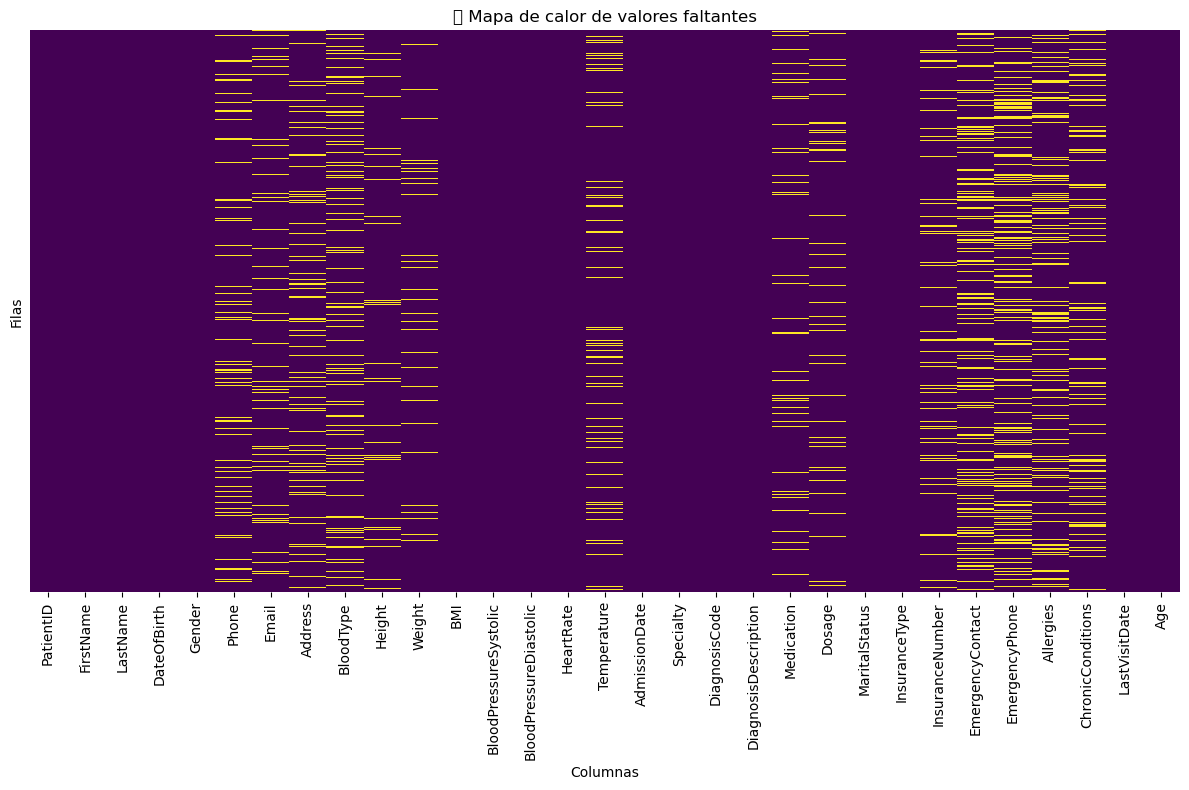


💭 REFLEXIÓN:
Columnas con más faltantes: Address, BloodType, Phone, Temperature,Email,Medication,Dosage,EmergencyContact,EmergencyPhone,Allergies,ChronicConditions     
Posible razón médica: _______________


In [27]:
# 🕳️ EJERCICIO 2.1: Análisis de Valores Faltantes
print("🕳️ ANÁLISIS DE VALORES FALTANTES")
print("=" * 40)
pd.set_option('display.max_rows', None)
# TODO: Analiza los valores faltantes
# 1. Cuenta valores faltantes por columna
# 2. Calcula el porcentaje de faltantes por columna
# 3. Identifica columnas con más del 20% de valores faltantes
# 4. Crea una visualización (heatmap) de valores faltantes

# Tu código aquí:
if False:
    print(f'Valores nulos en la columna PatientID {df_original['PatientID'].isnull().sum()} ') 
    print(f'Valores nulos en la columna FirstName {df_original['FirstName'].isnull().sum()} ') 
    print(f'Valores nulos en la columna LastName {df_original['LastName'].isnull().sum()} ')
    print(f'Valores nulos en la columna DateOfBirth {df_original['DateOfBirth'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Gender {df_original['Gender'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Phone {df_original['Phone'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Email {df_original['Email'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Address {df_original['Address'].isnull().sum()} ') 
    print(f'Valores nulos en la columna BloodType {df_original['BloodType'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Height {df_original['Height'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Weight {df_original['Weight'].isnull().sum()} ') 
    print(f'Valores nulos en la columna BMI {df_original['BMI'].isnull().sum()} ') 
    print(f'Valores nulos en la columna BloodPressureSystolic {df_original['BloodPressureSystolic'].isnull().sum()} ') 
    print(f'Valores nulos en la columna HeartRate {df_original['HeartRate'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Temperature {df_original['Temperature'].isnull().sum()} ') 
    print(f'Valores nulos en la columna AdmissionDate {df_original['AdmissionDate'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Specialty {df_original['Specialty'].isnull().sum()} ') 
    print(f'Valores nulos en la columna DiagnosisCode {df_original['DiagnosisCode'].isnull().sum()} ') 
    print(f'Valores nulos en la columna DiagnosisDescription {df_original['DiagnosisDescription'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Medication {df_original['Medication'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Dosage {df_original['Dosage'].isnull().sum()} ') 
    print(f'Valores nulos en la columna MaritalStatus {df_original['MaritalStatus'].isnull().sum()} ') 
    print(f'Valores nulos en la columna InsuranceType {df_original['InsuranceType'].isnull().sum()} ') 
    print(f'Valores nulos en la columna InsuranceNumber {df_original['InsuranceNumber'].isnull().sum()} ') 
    print(f'Valores nulos en la columna EmergencyContact {df_original['EmergencyContact'].isnull().sum()} ') 
    print(f'Valores nulos en la columna EmergencyPhone {df_original['EmergencyPhone'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Allergies {df_original['Allergies'].isnull().sum()} ') 
    print(f'Valores nulos en la columna ChronicConditions {df_original['ChronicConditions'].isnull().sum()} ') 
    print(f'Valores nulos en la columna LastVisitDate {df_original['LastVisitDate'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Age {df_original['Age'].isnull().sum()} ') 

print('------------------------------- Porcentaje de faltantes ------------------------')

porcentaje_nulos = df_original.isnull().mean().round(2) * 100
print(f'Porcentaje de faltantes: \n {porcentaje_nulos}')
columnas_mas_20 = porcentaje_nulos[porcentaje_nulos >= 20]
print('------------------------------- Columnas con más del 20% de nulos ------------------------')
print(columnas_mas_20)

plt.figure(figsize=(12, 8))  # Ajusta el tamaño según tu gusto

sns.heatmap(df_original.isnull(), 
            cbar=False, 
            cmap='viridis', 
            yticklabels=False)

plt.title('🕳️ Mapa de calor de valores faltantes')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.tight_layout()
plt.show()



# PREGUNTA: ¿Qué columnas tienen más valores faltantes? ¿Por qué crees que esto ocurre en un contexto médico?
print("\n💭 REFLEXIÓN:")
print("Columnas con más faltantes: Address, BloodType, Phone, Temperature,Email,Medication,Dosage,EmergencyContact,EmergencyPhone,Allergies,ChronicConditions     ")
print("Posible razón médica: _______________")

In [4]:
# 👥 EJERCICIO 2.2: Análisis de Duplicados
print("👥 ANÁLISIS DE DUPLICADOS")
print("=" * 40)

# TODO: Analiza los duplicados
# 1. Cuenta duplicados exactos
# 2. Busca duplicados basados solo en PatientID
# 3. Busca duplicados basados en nombre completo + fecha de nacimiento
# 4. Identifica registros que podrían ser el mismo paciente con variaciones

# Tu código aquí:


# PREGUNTA: ¿Cómo determinarías si dos registros corresponden al mismo paciente?
print("\n💭 REFLEXIÓN:")
print("Criterios para identificar mismo paciente: _______________")

👥 ANÁLISIS DE DUPLICADOS

💭 REFLEXIÓN:
Criterios para identificar mismo paciente: _______________


In [5]:
# 🔤 EJERCICIO 2.3: Análisis de Inconsistencias de Formato
print("🔤 ANÁLISIS DE INCONSISTENCIAS DE FORMATO")
print("=" * 40)

# TODO: Analiza problemas de formato en:
# 1. Fechas (DateOfBirth, AdmissionDate, LastVisitDate)
# 2. Teléfonos (Phone, EmergencyPhone) 
# 3. Géneros (Gender)
# 4. Nombres (FirstName, LastName)
# 5. Códigos médicos (DiagnosisCode)

# Ejemplo para fechas:
print("📅 PROBLEMAS EN FECHAS:")
# Muestra valores únicos extraños en columnas de fecha

# Tu código aquí para analizar cada tipo de formato:


print("\n💭 REFLEXIÓN:")
print("Formato más problemático: _______________")
print("Estrategia de normalización: _______________")

🔤 ANÁLISIS DE INCONSISTENCIAS DE FORMATO
📅 PROBLEMAS EN FECHAS:

💭 REFLEXIÓN:
Formato más problemático: _______________
Estrategia de normalización: _______________


In [6]:
# 🎪 EJERCICIO 2.4: Detección de Valores Atípicos
print("🎪 DETECCIÓN DE VALORES ATÍPICOS")
print("=" * 40)

# TODO: Detecta valores atípicos en variables numéricas:
# 1. Age (edades imposibles)
# 2. Height y Weight (medidas extremas)
# 3. BloodPressureSystolic/Diastolic (presión anormal)
# 4. HeartRate (frecuencia cardíaca imposible)
# 5. Temperature (temperatura corporal extrema)

# Para cada variable numérica:
# - Calcula estadísticas descriptivas
# - Identifica valores fuera de rangos médicos normales
# - Crea visualizaciones (boxplots)

# Tu código aquí:


print("\n💭 REFLEXIÓN:")
print("Variable con más atípicos: _______________")
print("Posibles causas: _______________")

🎪 DETECCIÓN DE VALORES ATÍPICOS

💭 REFLEXIÓN:
Variable con más atípicos: _______________
Posibles causas: _______________


## 🛠️ Paso 3: Limpieza de Valores Faltantes

Ahora aplicarás estrategias específicas para manejar los valores faltantes según el contexto médico.

### 🎯 Estrategias por Tipo de Campo:

| 📋 **Tipo de Campo** | 🔧 **Estrategia Recomendada** | 📝 **Justificación** |
|---------------------|-------------------------------|---------------------|
| **Identificación** (PatientID) | Eliminar registro | Campo crítico |
| **Contacto** (Phone, Email) | Imputar "No disponible" | No crítico |
| **Médico Crítico** (BloodType) | Eliminar o flag especial | Importante para tratamiento |
| **Medidas** (Height, Weight) | Imputar con mediana | Valores típicos |
| **Opcional** (Allergies) | Imputar "Ninguna conocida" | Conservador |

In [7]:
# 🔧 EJERCICIO 3.1: Estrategia para Campos Críticos
print("🔧 LIMPIEZA DE CAMPOS CRÍTICOS")
print("=" * 40)

# TODO: Crea una copia del dataset para trabajar
df_clean = # Tu código aquí

# TODO: Elimina registros donde falten campos críticos:
# - PatientID (si está faltante)
# - Campos que consideres absolutamente necesarios

print("📊 Registros antes de eliminar críticos:", len(df_clean))

# Tu código aquí:


print("📊 Registros después de eliminar críticos:", len(df_clean))
print("🗑️ Registros eliminados:", "___")

# PREGUNTA: ¿Qué otros campos considerarías críticos en un contexto médico?

SyntaxError: invalid syntax (2005430741.py, line 6)

In [ ]:
# 📞 EJERCICIO 3.2: Imputación de Campos de Contacto
print("📞 IMPUTACIÓN DE CAMPOS DE CONTACTO")
print("=" * 40)

# TODO: Para campos de contacto no críticos, imputa valores apropiados:
# - Phone: "No disponible"
# - Email: "No disponible"  
# - Address: "Dirección no registrada"
# - EmergencyContact: "No especificado"
# - EmergencyPhone: "No disponible"

# Tu código aquí:


# Valida los resultados
print("✅ Valores faltantes en campos de contacto después de imputación:")
contact_fields = ['Phone', 'Email', 'Address', 'EmergencyContact', 'EmergencyPhone']
# Muestra el recuento de faltantes para estos campos

In [ ]:
# 🩺 EJERCICIO 3.3: Imputación de Campos Médicos
print("🩺 IMPUTACIÓN DE CAMPOS MÉDICOS")
print("=" * 40)

# TODO: Para campos médicos, usa estrategias apropiadas:
# 1. Height/Weight: Imputa con la mediana (convierte a numérico primero)
# 2. BloodType: Mantén como faltante o elimina (decisión crítica)
# 3. Allergies: "Ninguna conocida"
# 4. ChronicConditions: "Ninguna conocida"
# 5. Medication/Dosage: Dependiendo del contexto

# Paso 1: Limpia y convierte campos numéricos
print("🔢 Limpiando campos numéricos...")

# Tu código aquí para Height:


# Tu código aquí para Weight:


# Paso 2: Imputa campos médicos opcionales
print("💊 Imputando campos médicos opcionales...")

# Tu código aquí:


print("✅ Resumen de faltantes después de imputación médica:")
# Muestra resumen de valores faltantes restantes

## 👥 Paso 4: Eliminación de Duplicados

Los duplicados en registros médicos pueden ser peligrosos. Necesitas identificar y manejar cuidadosamente estos casos.

### 🎯 Tipos de Duplicados a Considerar:
1. **Exactos**: Registros 100% idénticos
2. **Por ID**: Mismo PatientID (re-registros)
3. **Por Identidad**: Mismo nombre + fecha nacimiento
4. **Fuzzy**: Nombres similares con pequeñas variaciones

In [ ]:
# 👥 EJERCICIO 4.1: Eliminación de Duplicados Exactos
print("👥 ELIMINACIÓN DE DUPLICADOS EXACTOS")
print("=" * 40)

# TODO: 
# 1. Identifica y cuenta duplicados exactos
# 2. Elimina duplicados exactos manteniendo el primer registro
# 3. Documenta cuántos se eliminaron

print("📊 Registros antes de eliminar duplicados exactos:", len(df_clean))

# Tu código aquí:


print("📊 Registros después de eliminar duplicados exactos:", len(df_clean))
print("🗑️ Duplicados exactos eliminados:", "___")

In [ ]:
# 🆔 EJERCICIO 4.2: Análisis de Duplicados por PatientID
print("🆔 ANÁLISIS DE DUPLICADOS POR PATIENTID")
print("=" * 40)

# TODO:
# 1. Encuentra registros con el mismo PatientID
# 2. Analiza si son verdaderos re-registros o errores
# 3. Decide una estrategia (eliminar o consolidar)

# Tu código aquí:


# PREGUNTA: Si un paciente tiene múltiples registros con el mismo ID, 
# ¿cómo decidirías cuál mantener?
print("\n💭 REFLEXIÓN:")
print("Estrategia para múltiples registros del mismo paciente: _______________")

In [ ]:
# 👤 EJERCICIO 4.3: Detección de Duplicados por Identidad
print("👤 DETECCIÓN DE DUPLICADOS POR IDENTIDAD")
print("=" * 40)

# TODO:
# 1. Busca registros con mismo FirstName + LastName + DateOfBirth
# 2. Identifica posibles duplicados con errores tipográficos
# 3. Aplica una estrategia de limpieza conservadora

# Estrategia sugerida: Crear una columna de "identidad" normalizada
# df_clean['NormalizedName'] = df_clean['FirstName'].str.upper().str.strip() + '_' + df_clean['LastName'].str.upper().str.strip()

# Tu código aquí:


print("💭 REFLEXIÓN:")
print("¿Cómo manejarías nombres muy similares pero no idénticos?")

## 🔧 Paso 5: Estandarización de Formatos

La inconsistencia en formatos puede causar problemas graves en análisis posteriores. Necesitas estandarizar todos los campos.

### 🎯 Campos a Estandarizar:
- **Fechas**: Formato ISO (YYYY-MM-DD)
- **Teléfonos**: Formato único consistente
- **Nombres**: Capitalización adecuada
- **Géneros**: Valores estándar
- **Códigos médicos**: Formato válido

In [ ]:
# 📅 EJERCICIO 5.1: Estandarización de Fechas
print("📅 ESTANDARIZACIÓN DE FECHAS")
print("=" * 40)

# TODO: Estandariza las columnas de fecha:
# 1. DateOfBirth
# 2. AdmissionDate  
# 3. LastVisitDate

# Estrategia:
# - Intenta convertir con pd.to_datetime()
# - Maneja errores convirtiendo a NaT
# - Documenta valores que no se pudieron convertir

date_columns = ['DateOfBirth', 'AdmissionDate', 'LastVisitDate']

for col in date_columns:
    print(f"\n🔄 Procesando {col}...")
    
    # Tu código aquí:
    # 1. Muestra algunos valores problemáticos antes de convertir
    # 2. Convierte a datetime
    # 3. Reporta cuántos valores no se pudieron convertir
    

print("✅ Fechas estandarizadas exitosamente!")

In [ ]:
# 📱 EJERCICIO 5.2: Estandarización de Teléfonos
print("📱 ESTANDARIZACIÓN DE TELÉFONOS")
print("=" * 40)

# TODO: Crea una función para limpiar teléfonos
def clean_phone(phone):
    """
    Limpia y estandariza números de teléfono
    Formato objetivo: 6XXXXXXXX (para móviles españoles)
    """
    if pd.isna(phone) or phone == 'No disponible':
        return phone
    
    # Tu código aquí:
    # 1. Convertir a string
    # 2. Remover caracteres especiales (+, -, espacios, paréntesis)
    # 3. Manejar prefijo internacional (+34)
    # 4. Validar que tiene 9 dígitos para números españoles
    # 5. Marcar como "TELEFONO_INVALIDO" si no cumple criterios
    
    return phone  # Cambiar por tu implementación

# Aplica la función a las columnas de teléfono
phone_columns = ['Phone', 'EmergencyPhone']

for col in phone_columns:
    print(f"\n📞 Limpiando {col}...")
    # Tu código aquí:
    

print("✅ Teléfonos estandarizados!")

In [ ]:
# 👤 EJERCICIO 5.3: Estandarización de Nombres y Géneros
print("👤 ESTANDARIZACIÓN DE NOMBRES Y GÉNEROS")
print("=" * 40)

# TODO: Estandariza nombres
def clean_name(name):
    """Limpia y estandariza nombres"""
    if pd.isna(name):
        return name
    
    # Tu código aquí:
    # 1. Convertir a string
    # 2. Remover espacios extra
    # 3. Capitalizar correctamente (Title Case)
    # 4. Manejar caracteres especiales
    
    return str(name).strip().title()

# Aplica a nombres
name_columns = ['FirstName', 'LastName', 'EmergencyContact']
for col in name_columns:
    # Tu código aquí:
    pass

print("✅ Nombres estandarizados!")

# TODO: Estandariza géneros
print("\n⚥ Estandarizando géneros...")
def standardize_gender(gender):
    """Estandariza valores de género"""
    if pd.isna(gender):
        return gender
    
    gender = str(gender).upper().strip()
    
    # Tu código aquí:
    # Mapear todas las variaciones a "Masculino" o "Femenino"
    # Ejemplos: M, MASCULINO, Hombre, Male -> "Masculino"
    #          F, FEMENINO, Mujer, Female -> "Femenino"
    
    return gender

# Aplica estandarización de género
# Tu código aquí:

print("✅ Géneros estandarizados!")

## 🎪 Paso 6: Tratamiento de Valores Atípicos

Los valores atípicos en datos médicos pueden indicar errores de captura o casos médicos especiales. Debes manejarlos cuidadosamente.

### 🎯 Rangos Médicos Normales:
- **Edad**: 0-120 años
- **Altura**: 50-250 cm  
- **Peso**: 2-300 kg
- **Presión Sistólica**: 70-200 mmHg
- **Presión Diastólica**: 40-120 mmHg
- **Frecuencia Cardíaca**: 30-200 bpm
- **Temperatura**: 35-42°C

In [ ]:
# 🎪 EJERCICIO 6.1: Detección Sistemática de Atípicos
print("🎪 DETECCIÓN SISTEMÁTICA DE VALORES ATÍPICOS")
print("=" * 40)

# TODO: Define rangos médicos válidos
medical_ranges = {
    'Age': (0, 120),
    'Height': (50, 250),  # cm
    'Weight': (2, 300),   # kg
    'BloodPressureSystolic': (70, 200),
    'BloodPressureDiastolic': (40, 120),
    'HeartRate': (30, 200),
    'Temperature': (35, 42),
    'BMI': (10, 60)
}

# Función para detectar atípicos
def detect_outliers(df, column, min_val, max_val):
    """Detecta valores fuera del rango médico normal"""
    # Tu código aquí:
    # 1. Convierte la columna a numérico
    # 2. Identifica valores fuera del rango
    # 3. Retorna índices de valores atípicos
    pass

# Aplica detección a cada variable
outlier_summary = {}
for column, (min_val, max_val) in medical_ranges.items():
    if column in df_clean.columns:
        print(f"\n🔍 Analizando {column} (rango normal: {min_val}-{max_val})...")
        # Tu código aquí:
        

print("\n📊 RESUMEN DE VALORES ATÍPICOS:")
for column, count in outlier_summary.items():
    print(f"   {column}: {count} valores atípicos")

In [ ]:
# 🔧 EJERCICIO 6.2: Tratamiento de Valores Atípicos
print("🔧 TRATAMIENTO DE VALORES ATÍPICOS")
print("=" * 40)

# TODO: Implementa estrategias de tratamiento:
# 1. Valores imposibles -> NaN
# 2. Valores extremos pero posibles -> Marcar con flag
# 3. Errores de entrada (texto en numéricos) -> NaN

def treat_outliers(df, column, min_val, max_val, strategy='cap'):
    """
    Trata valores atípicos según estrategia especificada
    
    Strategies:
    - 'remove': Convierte a NaN
    - 'cap': Limita a min/max
    - 'flag': Marca pero mantiene valor
    """
    # Tu código aquí:
    pass

# Aplica tratamiento
print("🏥 Aplicando tratamiento médico conservador...")

# Para cada variable, decide la estrategia más apropiada:
treatment_strategies = {
    'Age': 'remove',  # Edades imposibles son errores claros
    'Height': 'remove',  # Alturas imposibles son errores
    'Weight': 'remove',  # Pesos imposibles son errores
    'BloodPressureSystolic': 'flag',  # Podría ser emergencia médica
    'BloodPressureDiastolic': 'flag',  # Podría ser emergencia médica
    'HeartRate': 'flag',  # Podría ser condición médica
    'Temperature': 'flag',  # Podría ser fiebre alta o hipotermia
}

for column, strategy in treatment_strategies.items():
    if column in df_clean.columns and column in medical_ranges:
        min_val, max_val = medical_ranges[column]
        print(f"\n🔄 Tratando {column} con estrategia '{strategy}'...")
        # Tu código aquí:
        

print("✅ Valores atípicos tratados!")

## 🔢 Paso 7: Corrección de Tipos de Datos

Asegúrate de que cada columna tiene el tipo de dato correcto para análisis posteriores.

### 🎯 Tipos Objetivo:
- **Identificadores**: String
- **Fechas**: datetime64
- **Medidas**: float64
- **Categorías**: category o string
- **Booleanos**: bool

In [ ]:
# 🔢 EJERCICIO 7.1: Conversión de Tipos de Datos
print("🔢 CONVERSIÓN DE TIPOS DE DATOS")
print("=" * 40)

# TODO: Define los tipos objetivo para cada columna
target_types = {
    'PatientID': 'string',
    'FirstName': 'string',
    'LastName': 'string',
    'DateOfBirth': 'datetime64[ns]',
    'Gender': 'category',
    'Phone': 'string',
    'Email': 'string',
    'Address': 'string',
    'BloodType': 'category',
    'Height': 'float64',
    'Weight': 'float64',
    'BMI': 'float64',
    'BloodPressureSystolic': 'float64',
    'BloodPressureDiastolic': 'float64',
    'HeartRate': 'float64',
    'Temperature': 'float64',
    'AdmissionDate': 'datetime64[ns]',
    'Specialty': 'category',
    'DiagnosisCode': 'string',
    'DiagnosisDescription': 'string',
    'Medication': 'string',
    'Dosage': 'string',
    'MaritalStatus': 'category',
    'InsuranceType': 'category',
    'InsuranceNumber': 'string',
    'EmergencyContact': 'string',
    'EmergencyPhone': 'string',
    'Allergies': 'string',
    'ChronicConditions': 'string',
    'LastVisitDate': 'datetime64[ns]',
    'Age': 'int64'
}

print("📊 Tipos actuales vs objetivos:")
for column in df_clean.columns:
    current_type = df_clean[column].dtype
    target_type = target_types.get(column, 'sin especificar')
    print(f"   {column}: {current_type} -> {target_type}")

# TODO: Aplica las conversiones de tipo
print("\n🔄 Aplicando conversiones...")

for column, target_type in target_types.items():
    if column in df_clean.columns:
        try:
            # Tu código aquí:
            # Convierte cada columna al tipo objetivo
            # Maneja errores apropiadamente
            pass
        except Exception as e:
            print(f"⚠️ Error convirtiendo {column}: {e}")

print("✅ Tipos de datos corregidos!")

In [ ]:
# 🧮 EJERCICIO 7.2: Recalcular Campos Derivados
print("🧮 RECÁLCULO DE CAMPOS DERIVADOS")
print("=" * 40)

# TODO: Recalcula campos que dependen de otros:
# 1. BMI = Weight(kg) / (Height(m))^2
# 2. Age = Years desde DateOfBirth hasta AdmissionDate

print("📏 Recalculando BMI...")
# Tu código aquí:
# 1. Convierte altura a metros
# 2. Calcula BMI solo donde height y weight son válidos
# 3. Redondea a 1 decimal


print("🎂 Recalculando Age...")
# Tu código aquí:
# 1. Calcula edad en años basado en fechas
# 2. Maneja casos donde las fechas son NaT


print("✅ Campos derivados recalculados!")

# Validación
print("\n📊 Estadísticas de campos recalculados:")
print("BMI:")
print(df_clean['BMI'].describe())
print("\nAge:")
print(df_clean['Age'].describe())

## ✅ Paso 8: Validación Final

Antes de dar por terminada la limpieza, debes validar que el dataset está en buenas condiciones.

### 🎯 Validaciones Requeridas:
1. **Completitud**: Verificar valores faltantes restantes
2. **Consistencia**: Verificar relaciones lógicas
3. **Integridad**: Verificar rangos válidos
4. **Calidad**: Métricas generales de calidad

In [ ]:
# ✅ EJERCICIO 8.1: Reporte de Completitud
print("✅ REPORTE DE COMPLETITUD")
print("=" * 40)

# TODO: Genera un reporte completo de la calidad final
print("📊 VALORES FALTANTES FINALES:")
missing_final = df_clean.isnull().sum().sort_values(ascending=False)
total_rows = len(df_clean)

for column, missing in missing_final.items():
    if missing > 0:
        percentage = (missing / total_rows) * 100
        print(f"   {column}: {missing:,} ({percentage:.1f}%)")

print(f"\n📏 DIMENSIONES FINALES:")
print(f"   Filas: {df_clean.shape[0]:,}")
print(f"   Columnas: {df_clean.shape[1]}")

print(f"\n👥 DUPLICADOS FINALES:")
print(f"   Duplicados exactos: {df_clean.duplicated().sum()}")

# TODO: Calcula métricas de calidad
total_cells = df_clean.shape[0] * df_clean.shape[1]
empty_cells = df_clean.isnull().sum().sum()
completeness = ((total_cells - empty_cells) / total_cells) * 100

print(f"\n📈 MÉTRICAS DE CALIDAD:")
print(f"   Completitud general: {completeness:.1f}%")
print(f"   Celdas vacías: {empty_cells:,} de {total_cells:,}")

In [ ]:
# 🔍 EJERCICIO 8.2: Validaciones de Consistencia
print("🔍 VALIDACIONES DE CONSISTENCIA")
print("=" * 40)

# TODO: Verifica relaciones lógicas entre campos
print("🏥 Verificando consistencias médicas...")

# 1. BMI vs Height/Weight
print("\n1️⃣ Consistencia BMI:")
# Calcula BMI esperado y compara con BMI almacenado
# Tu código aquí:


# 2. Edad vs Fechas
print("\n2️⃣ Consistencia de Edad:")
# Verifica que la edad calculada sea consistente
# Tu código aquí:


# 3. Presión arterial
print("\n3️⃣ Consistencia Presión Arterial:")
# Verifica que sistólica > diastólica
# Tu código aquí:


# 4. Fechas lógicas
print("\n4️⃣ Consistencia de Fechas:")
# Verifica que AdmissionDate >= DateOfBirth
# Verifica que LastVisitDate <= AdmissionDate (si aplicable)
# Tu código aquí:


print("✅ Validaciones de consistencia completadas!")

In [ ]:
# 💾 EJERCICIO 8.3: Guardar Dataset Limpio
print("💾 GUARDANDO DATASET LIMPIO")
print("=" * 40)

# TODO: Guarda el dataset limpio con documentación
from datetime import datetime

# Generar nombre con timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
clean_filename = f"registros_medicos_limpios_{timestamp}.csv"

# Guardar dataset limpio
df_clean.to_csv(clean_filename, index=False)
print(f"✅ Dataset limpio guardado como: {clean_filename}")

# También guardar con nombre fijo
df_clean.to_csv("registros_medicos_limpios.csv", index=False)
print(f"✅ También guardado como: registros_medicos_limpios.csv")

# TODO: Crear reporte de transformaciones aplicadas
report = f"""
📋 REPORTE DE LIMPIEZA DE DATOS MÉDICOS
{'='*50}

📅 Fecha de procesamiento: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

📊 RESUMEN DE TRANSFORMACIONES:
   ✅ Valores faltantes imputados/eliminados
   ✅ Duplicados detectados y eliminados  
   ✅ Formatos estandarizados (fechas, teléfonos, nombres)
   ✅ Valores atípicos tratados según criterio médico
   ✅ Tipos de datos corregidos
   ✅ Campos derivados recalculados

📏 DIMENSIONES:
   Dataset original: _____ filas
   Dataset limpio: {df_clean.shape[0]:,} filas
   Registros eliminados: _____ 
   Columnas: {df_clean.shape[1]}

📈 CALIDAD FINAL:
   Completitud: {completeness:.1f}%
   Duplicados: {df_clean.duplicated().sum()}
   Tipos correctos: ✅

🎯 PRÓXIMOS PASOS RECOMENDADOS:
   1. Análisis exploratorio de datos (EDA)
   2. Feature engineering para variables predictivas
   3. Análisis estadístico y correlaciones
   4. Preparación para modelado (encoding, scaling)
"""

# Guardar reporte
with open(f"reporte_limpieza_{timestamp}.txt", "w", encoding="utf-8") as f:
    f.write(report)

print(report)
print(f"\n📝 Reporte guardado como: reporte_limpieza_{timestamp}.txt")

## 🎉 ¡Felicitaciones! Ejercicio Completado

Has completado exitosamente el ejercicio de limpieza de datos médicos. 

### 📚 Lo que has aprendido:

1. **🔍 Análisis Exploratorio**: Identificar problemas de calidad en datos reales
2. **🛠️ Técnicas de Limpieza**: Aplicar estrategias específicas para cada tipo de problema
3. **🏥 Contexto de Dominio**: Considerar aspectos médicos en decisiones de limpieza
4. **📊 Validación**: Verificar la calidad y consistencia del resultado final
5. **📝 Documentación**: Mantener registro de todas las transformaciones

### 🎯 Evaluación de tu trabajo:

**Revisa que hayas completado:**
- [ ] ✅ Análisis completo de problemas de calidad
- [ ] ✅ Estrategias apropiadas para valores faltantes
- [ ] ✅ Eliminación correcta de duplicados
- [ ] ✅ Estandarización de formatos
- [ ] ✅ Tratamiento médicamente apropiado de atípicos
- [ ] ✅ Corrección de tipos de datos
- [ ] ✅ Validación y documentación final

### 🚀 Próximos pasos:

1. **📊 EDA Avanzado**: Explora patrones en los datos limpios
2. **🔬 Análisis Estadístico**: Busca correlaciones y tendencias médicas
3. **🤖 Preparación para ML**: Feature engineering y encoding
4. **📈 Visualizaciones**: Crea dashboards para profesionales médicos

---

> 💡 **Recuerda**: En el mundo real, la limpieza de datos médicos debe siempre involucrar a profesionales del dominio médico para validar decisiones críticas.

**¡Excelente trabajo! 🎉👩‍⚕️👨‍⚕️**